In [1]:
import numpy as np
import os
import pandas as pd
import pickle
from zipfile import ZipFile

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
ZIP_PATH = 'data/dataset.zip'

with ZipFile(ZIP_PATH, 'r') as z:
    with z.open(z.namelist()[0]) as f:
        data = pd.read_csv(f)

In [3]:
data.columns.to_list()

['date',
 'cloud_cover',
 'sunshine',
 'global_radiation',
 'max_temp',
 'mean_temp',
 'min_temp',
 'precipitation',
 'pressure',
 'snow_depth']

In [4]:
model1 = ['pressure','sunshine','mean_temp']

In [5]:
data.dropna(axis=0, inplace=True)

In [6]:
X = data[model1]
y = data['precipitation']

In [18]:
X['mean_temp'].min()

-7.6

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = RandomForestRegressor(max_depth=10,
                              min_samples_leaf=4,
                              min_samples_split=10,
                              n_estimators=500,
                              random_state=13)

In [10]:
rf_model = model.fit(X_train, y_train)

In [11]:
importances = rf_model.feature_importances_
feature_names = X.columns.to_list()

In [12]:
rf_featureImportanceDF = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [13]:
rf_featureImportanceDF

,Feature,Importance
0,pressure,0.532765
2,mean_temp,0.244119
1,sunshine,0.223117


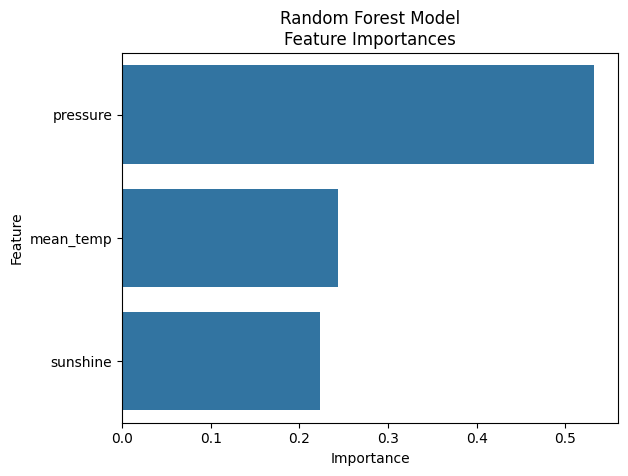

In [14]:
sns.barplot(x='Importance', y='Feature', data=rf_featureImportanceDF)
plt.title(f'Random Forest Model\nFeature Importances')
plt.show()

In [16]:
preds = rf_model.predict(X_test)
mse_score = mean_squared_error(y_test, preds)

print(mse_score)

11.411071773978598


In [18]:
pickle.dump(rf_model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))